<a href="https://colab.research.google.com/github/seque1204/EduceLab/blob/main/FantaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/EduceLab
!git clone https://github.com/seque1204/EduceLab
%cd /content/EduceLab

Cloning into 'EduceLab'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 340 (delta 11), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (340/340), 45.19 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/EduceLab


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import imghdr
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
def commitChanges(comment, username, token):
  string = "https://" + username +':' + token + "@github.com/seque1204/EduceLab.git"
  !git add .
  !git commit -m "{comment}"
  !git push "{string}"
def signIn(email, username):
  !git config user.email "{email}"
  !git config user.name "{username}"

In [ ]:
#Change signIn when using!!!

signIn('jsequeirasanchez@gmail.com', "seque1204")
#signIn('angel.aguilar0225@gmail.com', 'akaguilar234')
data_dir = '/content/EduceLab/Data'

In [ ]:
image_exts = ['jpeg','jpg','png']
deleted_files = []

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
        deleted_files.append(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        os.remove(image_path)

In [ ]:
commitChanges('Deleted Files', 'seque1204' , 'token')

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
remote: Support for password authentication was removed on August 13, 2021.
remote: Please see https://docs.github.com/get-started/getting-started-with-git/about-remote-repositories#cloning-with-https-urls for information on currently recommended modes of authentication.
fatal: Authentication failed for 'https://github.com/seque1204/EduceLab.git/'


Found 265 files belonging to 2 classes.


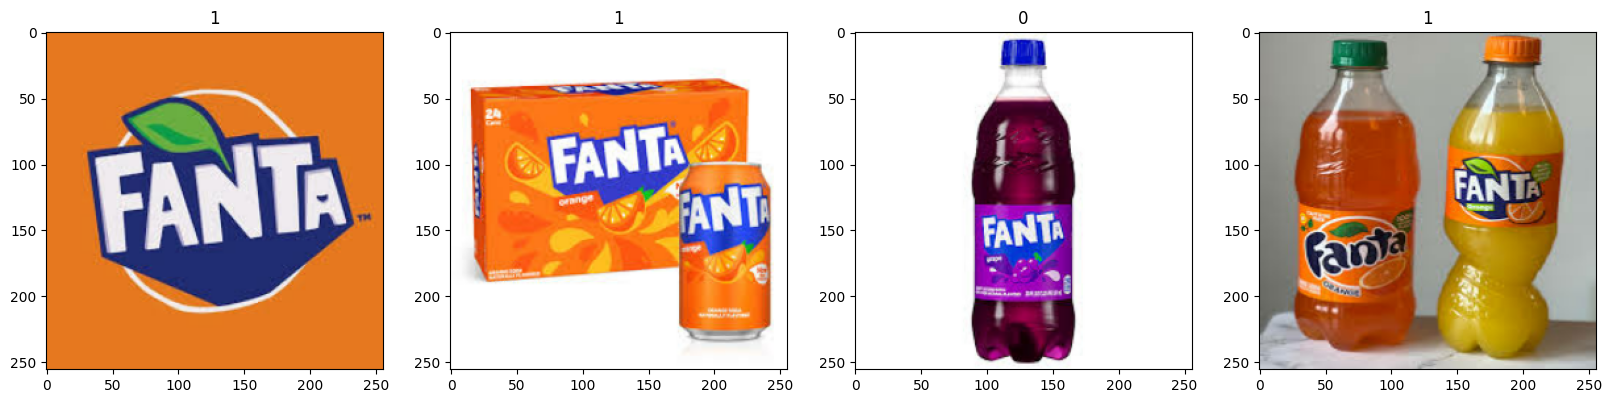

In [ ]:
# Print First image of each subfolder
data = tf.keras.utils.image_dataset_from_directory(data_dir)

def printImages(data):
  data_iterator = data.as_numpy_iterator()
  batch = data_iterator.next()
  fig, ax = plt.subplots(ncols=4, figsize=(20,20))
  for idx, img in enumerate(batch[0][:4]):
      #print image
      ax[idx].imshow(img.astype(int))
      ax[idx].title.set_text(batch[1][idx])
printImages(data)

In [ ]:
#Normalizing data to be between 0 and 1
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
# 80-10-10 data split
train_size = int(len(data)*.8)
#added 1 to each since the output for both were 0
val_size = int(len(data)*.1) + 1
test_size = int(len(data)*.1) +1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building the model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5163 - loss: 1.3308 - val_accuracy: 0.5000 - val_loss: 0.6887
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5363 - loss: 0.6860 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5234 - loss: 0.6830 - val_accuracy: 0.5625 - val_loss: 0.6373
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5619 - loss: 0.6326 - val_accuracy: 0.8438 - val_loss: 0.5085
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8693 - loss: 0.4608 - val_accuracy: 0.9375 - val_loss: 0.1729


# Performance

In [ ]:
hist.history

{'accuracy': [0.5178571343421936,
  0.5223214030265808,
  0.53125,
  0.5580357313156128,
  0.8839285969734192],
 'loss': [1.136886715888977,
  0.6869654655456543,
  0.6770104765892029,
  0.620398998260498,
  0.39511483907699585],
 'val_accuracy': [0.5, 0.5, 0.5625, 0.84375, 0.9375],
 'val_loss': [0.6887089610099792,
  0.6890836954116821,
  0.6372592449188232,
  0.5085086226463318,
  0.1728849858045578]}

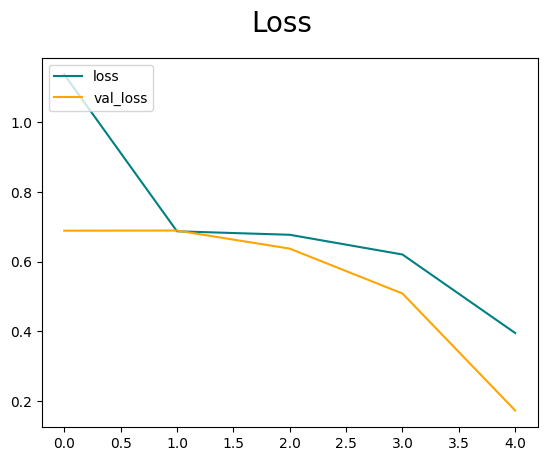

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.75, Recall:0.6000000238418579, Accuracy:0.6666666865348816


# testing

In [ ]:
img = cv2.imread('orangefanta.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Orange Fanta')
else:
  print(f'Predicted class is Purple Fanta')